**Machine Learning Assignment 1 - Group B**

In [770]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

import pandas as pd

df1=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/opel_corsa_01.csv', sep=";")
df2=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/opel_corsa_02.csv', sep=";")
#df3=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/peugeot_207_01.csv', sep=";")
#df4=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/peugeot_207_02.csv', sep=";")
df3=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/Car_Data/peugeot_01_LGa.csv')
df4=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/Car_Data/peugeot_02_LGa.csv')
df3 = df3[df3.roadSurface != 'FullOfHolesCondition']
df4 = df4[df4.roadSurface != 'FullOfHolesCondition']

#allframes = [df1,df2,df3,df4]
allframes = [df1, df2, df3, df4]

feature_names = list(df1.head(0))
feature_names.pop(0)

print(feature_names)
df1['drivingStyle'] = df1.drivingStyle.replace({'EvenPaceStyle': 0, 'AggressiveStyle': 1})
df1['roadSurface']= df1.roadSurface.replace({'SmoothCondition': 0, 'UnevenCondition': 1})
df2['drivingStyle'] = df2.drivingStyle.replace({'EvenPaceStyle': 0, 'AggressiveStyle': 1})
df2['roadSurface']= df2.roadSurface.replace({'SmoothCondition': 0, 'UnevenCondition': 1})
df3['drivingStyle'] = df3.drivingStyle.replace({'EvenPaceStyle': 0, 'AggressiveStyle': 1})
df3['roadSurface']= df3.roadSurface.replace({'SmoothCondition': 0, 'UnevenCondition': 1})
df4['drivingStyle'] = df4.drivingStyle.replace({'EvenPaceStyle': 0, 'AggressiveStyle': 1})
df4['roadSurface']= df4.roadSurface.replace({'SmoothCondition': 0, 'UnevenCondition': 1})



['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration', 'FuelConsumptionAverage', 'roadSurface', 'traffic', 'drivingStyle']


In [771]:
x = feature_names
#df.count(axis='columns')

In [772]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(7038, 18)
(4092, 18)
(6316, 17)
(3080, 17)


In [773]:
df = pd.concat(allframes)
df5 = pd.concat(allframes)
#print out first 5 rows of data set
#df.head()

c:\users\liam\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
c:\users\liam\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [774]:
df5.head()

,AltitudeVariation,EngineCoolantTemperature,EngineLoad,EngineRPM,FuelConsumptionAverage,IntakeAirTemperature,LongitudinalAcceleration,ManifoldAbsolutePressure,MassAirFlow,Unnamed: 0,VehicleSpeedAverage,VehicleSpeedInstantaneous,VehicleSpeedVariance,VehicleSpeedVariation,VerticalAcceleration,drivingStyle,roadSurface,traffic
0,-2.299988,68.0,4.705883,1796.0,19.497335,24.0,0.3555,106.0,15.81,59.0,13.223501,25.670519,121.592690,-2.476980,-0.1133,0,0,LowCongestionCondition
1,-2.099976,68.0,10.588236,1689.0,19.515722,22.0,0.4492,103.0,14.65,60.0,13.638919,24.094259,120.422571,-1.576260,-0.1289,0,0,LowCongestionCondition
2,-1.500000,68.0,27.450981,1599.0,19.441765,21.0,0.4258,103.0,11.85,61.0,14.031043,22.743179,118.456769,-1.351080,-0.1328,0,0,LowCongestionCondition
3,0.100037,69.0,24.313726,1620.0,19.388769,20.0,0.4140,104.0,12.21,62.0,14.171073,22.292820,117.571308,-0.450359,-0.0859,0,0,LowCongestionCondition
4,0.099976,69.0,20.000000,1708.0,19.301638,21.0,0.3945,104.0,11.91,63.0,14.328954,23.643900,117.074149,1.351080,-0.0664,0,0,LowCongestionCondition


In [775]:
df.drop(['Unnamed: 0', 'traffic'], axis=1, inplace=True)
df5.drop(['Unnamed: 0', 'traffic'], axis=1, inplace=True)
df5.head()

,AltitudeVariation,EngineCoolantTemperature,EngineLoad,EngineRPM,FuelConsumptionAverage,IntakeAirTemperature,LongitudinalAcceleration,ManifoldAbsolutePressure,MassAirFlow,VehicleSpeedAverage,VehicleSpeedInstantaneous,VehicleSpeedVariance,VehicleSpeedVariation,VerticalAcceleration,drivingStyle,roadSurface
0,-2.299988,68.0,4.705883,1796.0,19.497335,24.0,0.3555,106.0,15.81,13.223501,25.670519,121.592690,-2.476980,-0.1133,0,0
1,-2.099976,68.0,10.588236,1689.0,19.515722,22.0,0.4492,103.0,14.65,13.638919,24.094259,120.422571,-1.576260,-0.1289,0,0
2,-1.500000,68.0,27.450981,1599.0,19.441765,21.0,0.4258,103.0,11.85,14.031043,22.743179,118.456769,-1.351080,-0.1328,0,0
3,0.100037,69.0,24.313726,1620.0,19.388769,20.0,0.4140,104.0,12.21,14.171073,22.292820,117.571308,-0.450359,-0.0859,0,0
4,0.099976,69.0,20.000000,1708.0,19.301638,21.0,0.3945,104.0,11.91,14.328954,23.643900,117.074149,1.351080,-0.0664,0,0


In [776]:
df5.describe()

,AltitudeVariation,EngineCoolantTemperature,EngineLoad,EngineRPM,FuelConsumptionAverage,IntakeAirTemperature,LongitudinalAcceleration,ManifoldAbsolutePressure,MassAirFlow,VehicleSpeedAverage,VehicleSpeedInstantaneous,VehicleSpeedVariance,VehicleSpeedVariation,VerticalAcceleration,drivingStyle,roadSurface
count,20526.000000,20521.000000,20521.000000,20521.000000,20521.000000,20521.000000,20526.000000,20521.000000,20521.000000,20526.000000,20519.000000,20526.000000,20526.000000,20526.000000,20526.000000,20526.000000
mean,-0.277288,74.184007,36.173103,1526.855075,15.064395,24.260124,0.717826,116.547001,16.446303,40.536049,40.312892,174.856937,-0.029213,0.594821,0.126328,0.306392
std,2.160817,12.570001,26.366717,592.678939,4.756568,11.376940,1.659091,21.539724,10.035839,32.684890,35.318866,189.798118,2.504639,3.700660,0.332226,0.461006
min,-24.600006,12.000000,0.000000,0.000000,7.271883,7.000000,-3.065000,88.000000,0.880000,0.000000,0.000000,0.000000,-103.500000,-2.763100,0.000000,0.000000
25%,-1.499999,73.000000,18.431374,883.000000,11.309890,16.000000,-0.215000,103.000000,7.440000,16.020389,11.709359,43.675301,-0.900000,-0.508825,0.000000,0.000000
50%,-0.099998,79.000000,30.196079,1534.000000,14.372615,20.000000,0.394500,107.000000,15.410000,29.266714,31.500000,112.822027,0.000000,-0.057400,0.000000,0.000000
75%,0.700012,81.000000,56.862747,2040.000000,18.311926,33.000000,1.167575,123.000000,22.670000,55.694878,58.771980,234.770714,0.900002,0.257800,0.000000,1.000000
max,11.400002,89.000000,100.000000,3167.000000,45.336861,65.000000,8.477800,252.000000,73.250000,121.330733,124.749725,1418.370369,97.199997,17.944800,1.000000,1.000000


In [777]:
print(df5.shape)

(20526, 16)


In [778]:
print(df.shape)

(20526, 16)


Removing non numeric values from the df, confirming if any non numberic values existed by running shape

In [779]:
#import pandas as pd

#df = pd.DataFrame({'values_1': ['700','ABC','500','XYZ','1200'],
#                   'values_2': ['DDD','150','350','400','5000'] 
#                   })

df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)

print(df.shape)

(20515, 16)


In [780]:
df5 = df5.apply (pd.to_numeric, errors='coerce')
df5 = df5.dropna()
df5 = df5.reset_index(drop=True)

print(df.shape)

(20515, 16)


In [781]:
#xx = df.iloc[:,[1,2]] 
scaling= df5.iloc[:,0:14]


In [782]:
scaling.head()

,AltitudeVariation,EngineCoolantTemperature,EngineLoad,EngineRPM,FuelConsumptionAverage,IntakeAirTemperature,LongitudinalAcceleration,ManifoldAbsolutePressure,MassAirFlow,VehicleSpeedAverage,VehicleSpeedInstantaneous,VehicleSpeedVariance,VehicleSpeedVariation,VerticalAcceleration
0,-2.299988,68.0,4.705883,1796.0,19.497335,24.0,0.3555,106.0,15.81,13.223501,25.670519,121.592690,-2.476980,-0.1133
1,-2.099976,68.0,10.588236,1689.0,19.515722,22.0,0.4492,103.0,14.65,13.638919,24.094259,120.422571,-1.576260,-0.1289
2,-1.500000,68.0,27.450981,1599.0,19.441765,21.0,0.4258,103.0,11.85,14.031043,22.743179,118.456769,-1.351080,-0.1328
3,0.100037,69.0,24.313726,1620.0,19.388769,20.0,0.4140,104.0,12.21,14.171073,22.292820,117.571308,-0.450359,-0.0859
4,0.099976,69.0,20.000000,1708.0,19.301638,21.0,0.3945,104.0,11.91,14.328954,23.643900,117.074149,1.351080,-0.0664


In [783]:
min_max_scaler = preprocessing.StandardScaler() 
  
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit(scaling) 
rescaled = x_after_min_max_scaler.transform(scaling)

In [784]:
print(rescaled[:15,:4])

[[-0.93573017 -0.49230753 -1.19358654  0.45410753]
 [-0.84318259 -0.49230753 -0.97049278  0.27356016]
 [-0.56556807 -0.49230753 -0.33095736  0.12169788]
 [ 0.17478438 -0.41274107 -0.44994069  0.15713241]
 [ 0.17475615 -0.41274107 -0.6135428   0.30561997]
 [ 0.17478438 -0.41274107 -0.47968657  0.43892131]
 [ 0.26733196 -0.41274107 -0.49455948  0.4676064 ]
 [ 0.26730373 -0.41274107 -0.37557616  0.69539982]
 [ 0.22104406 -0.41274107 -0.25659276  1.05311986]
 [ 0.40613922 -0.41274107 -0.01862611  1.25391555]
 [ 0.35985132 -0.41274107  0.21934054  1.56101482]
 [ 0.31359164 -0.41274107 -0.42019488  1.08349232]
 [-0.14914628 -0.41274107  0.87374886  0.10482429]
 [-0.28792532 -0.33317461  0.57629058  0.26174865]
 [-0.4267608  -0.33317461 -0.22684695  0.3494913 ]]


In [785]:
minmaxscaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = minmaxscaler.fit_transform(scaling)

In [786]:
print(x_after_min_max_scaler[:15,:5])

[[0.61944482 0.72727273 0.04705883 0.5670982  0.32117325]
 [0.62500071 0.72727273 0.10588236 0.53331228 0.32165628]
 [0.6416667  0.72727273 0.27450981 0.50489422 0.31971336]
 [0.68611215 0.74025974 0.24313726 0.5115251  0.31832112]
 [0.68611046 0.74025974 0.2        0.53931165 0.3160321 ]
 [0.68611215 0.74025974 0.23529411 0.56425639 0.31256364]
 [0.69166805 0.74025974 0.23137255 0.56962425 0.30918237]
 [0.69166635 0.74025974 0.26274509 0.61225134 0.3077528 ]
 [0.68888925 0.74025974 0.29411766 0.67919166 0.30758178]
 [0.70000104 0.74025974 0.35686275 0.71676666 0.3080538 ]
 [0.69722224 0.74025974 0.41960785 0.77423429 0.31005354]
 [0.69444514 0.74025974 0.2509804  0.68487528 0.31252796]
 [0.66666568 0.74025974 0.59215687 0.50173666 0.31226981]
 [0.65833438 0.75324675 0.51372551 0.53110199 0.31147575]
 [0.64999969 0.75324675 0.30196079 0.54752131 0.31032533]]


In [787]:
x_after_min_max_scaler.shape

(20515, 14)

In [788]:
df5 = df5.iloc[:,:14]

In [789]:
df5.shape

(20515, 14)

In [790]:
df5.head()

,AltitudeVariation,EngineCoolantTemperature,EngineLoad,EngineRPM,FuelConsumptionAverage,IntakeAirTemperature,LongitudinalAcceleration,ManifoldAbsolutePressure,MassAirFlow,VehicleSpeedAverage,VehicleSpeedInstantaneous,VehicleSpeedVariance,VehicleSpeedVariation,VerticalAcceleration
0,-2.299988,68.0,4.705883,1796.0,19.497335,24.0,0.3555,106.0,15.81,13.223501,25.670519,121.592690,-2.476980,-0.1133
1,-2.099976,68.0,10.588236,1689.0,19.515722,22.0,0.4492,103.0,14.65,13.638919,24.094259,120.422571,-1.576260,-0.1289
2,-1.500000,68.0,27.450981,1599.0,19.441765,21.0,0.4258,103.0,11.85,14.031043,22.743179,118.456769,-1.351080,-0.1328
3,0.100037,69.0,24.313726,1620.0,19.388769,20.0,0.4140,104.0,12.21,14.171073,22.292820,117.571308,-0.450359,-0.0859
4,0.099976,69.0,20.000000,1708.0,19.301638,21.0,0.3945,104.0,11.91,14.328954,23.643900,117.074149,1.351080,-0.0664


In [791]:
#df3.shape

In [792]:
#df[0:,:14]= x_after_min_max_scaler

In [793]:
#x_after_min_max_scaler.shape

In [794]:
x_after_min_max_scaler[0,0]

0.6194448214898893

In [795]:
xxx = df5.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xxx)
df6 = pd.DataFrame(x_scaled)

In [796]:
#df[0:1,0:1]=x_after_min_max_scaler[0:1,0:1]

In [797]:
df6.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.619445,0.727273,0.047059,0.567098,0.321173,0.293103,0.296332,0.109756,0.206301,0.108987,0.205776,0.085727,0.134748,0.127961
1,0.625001,0.727273,0.105882,0.533312,0.321656,0.258621,0.304450,0.091463,0.190272,0.112411,0.193141,0.084902,0.142567,0.127207
2,0.641667,0.727273,0.274510,0.504894,0.319713,0.241379,0.302422,0.091463,0.151582,0.115643,0.182310,0.083516,0.144522,0.127019
3,0.686112,0.740260,0.243137,0.511525,0.318321,0.224138,0.301400,0.097561,0.156557,0.116797,0.178700,0.082892,0.152341,0.129284
4,0.686110,0.740260,0.200000,0.539312,0.316032,0.241379,0.299711,0.097561,0.152411,0.118098,0.189531,0.082541,0.167978,0.130226


In [798]:
#x_after_min_max_scaler.columns = df5.columns
df6.columns = df5.columns

In [799]:
df6.head()

,AltitudeVariation,EngineCoolantTemperature,EngineLoad,EngineRPM,FuelConsumptionAverage,IntakeAirTemperature,LongitudinalAcceleration,ManifoldAbsolutePressure,MassAirFlow,VehicleSpeedAverage,VehicleSpeedInstantaneous,VehicleSpeedVariance,VehicleSpeedVariation,VerticalAcceleration
0,0.619445,0.727273,0.047059,0.567098,0.321173,0.293103,0.296332,0.109756,0.206301,0.108987,0.205776,0.085727,0.134748,0.127961
1,0.625001,0.727273,0.105882,0.533312,0.321656,0.258621,0.304450,0.091463,0.190272,0.112411,0.193141,0.084902,0.142567,0.127207
2,0.641667,0.727273,0.274510,0.504894,0.319713,0.241379,0.302422,0.091463,0.151582,0.115643,0.182310,0.083516,0.144522,0.127019
3,0.686112,0.740260,0.243137,0.511525,0.318321,0.224138,0.301400,0.097561,0.156557,0.116797,0.178700,0.082892,0.152341,0.129284
4,0.686110,0.740260,0.200000,0.539312,0.316032,0.241379,0.299711,0.097561,0.152411,0.118098,0.189531,0.082541,0.167978,0.130226


In [800]:
#df.describe(include=[np.object])

In [801]:
#df['drivingStyle'] = df.drivingStyle.replace({'EvenPaceStyle': 0, 'AggressiveStyle': 1})
#df['roadSurface']= df.roadSurface.replace({'SmoothCondition': 0, 'UnevenCondition': 1})
#df6['drivingStyle'] = df6.drivingStyle.replace({'EvenPaceStyle': 0, 'AggressiveStyle': 1})
#df6['roadSurface']= df6.roadSurface.replace({'SmoothCondition': 0, 'UnevenCondition': 1})

In [802]:
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    #df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for opel_corsa_01', fontsize=15)
    plt.show()

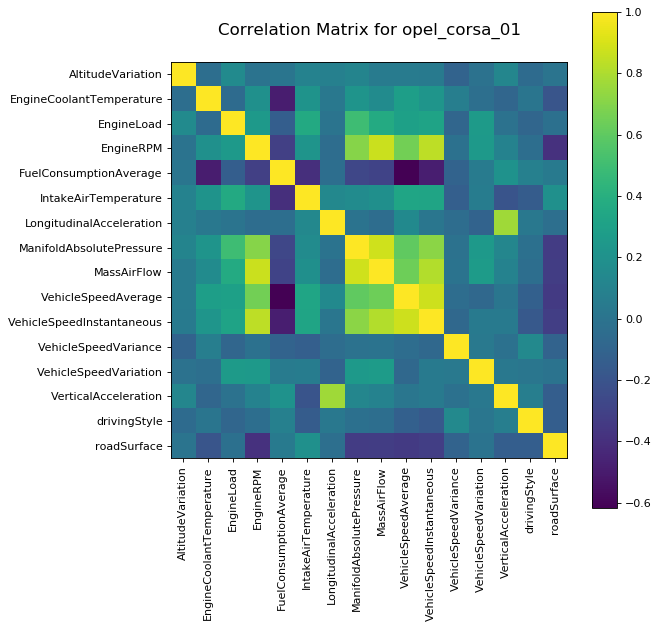

In [803]:
plotCorrelationMatrix(df, 8)

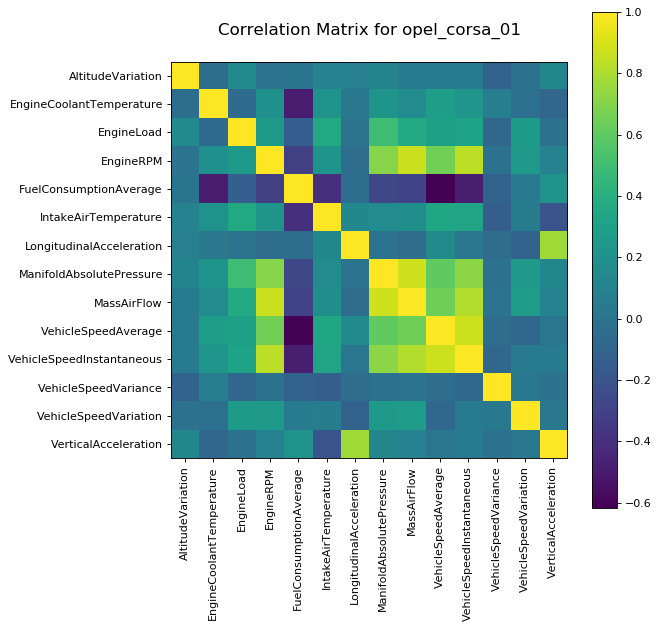

In [804]:
plotCorrelationMatrix(df6, 8)

Before balancing data, see how classifiers perform:


In [805]:
list(df6.columns)

['AltitudeVariation',
 'EngineCoolantTemperature',
 'EngineLoad',
 'EngineRPM',
 'FuelConsumptionAverage',
 'IntakeAirTemperature',
 'LongitudinalAcceleration',
 'ManifoldAbsolutePressure',
 'MassAirFlow',
 'VehicleSpeedAverage',
 'VehicleSpeedInstantaneous',
 'VehicleSpeedVariance',
 'VehicleSpeedVariation',
 'VerticalAcceleration']

In [806]:
features = ['AltitudeVariation','VehicleSpeedInstantaneous','VehicleSpeedAverage','VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad','EngineCoolantTemperature','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','IntakeAirTemperature','VerticalAcceleration','FuelConsumptionAverage']

In [807]:
X = df6[features]
X = X.round(3);
X.head()


,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
0,0.619,0.206,0.109,0.086,0.135,0.296,0.047,0.727,0.110,0.567,0.206,0.293,0.128,0.321
1,0.625,0.193,0.112,0.085,0.143,0.304,0.106,0.727,0.091,0.533,0.190,0.259,0.127,0.322
2,0.642,0.182,0.116,0.084,0.145,0.302,0.275,0.727,0.091,0.505,0.152,0.241,0.127,0.320
3,0.686,0.179,0.117,0.083,0.152,0.301,0.243,0.740,0.098,0.512,0.157,0.224,0.129,0.318
4,0.686,0.190,0.118,0.083,0.168,0.300,0.200,0.740,0.098,0.539,0.152,0.241,0.130,0.316


In [808]:
print(X.shape)

(20515, 14)


In [809]:

#feature_names.pop(16)
#feature_names.pop(15)
#feature_names.pop(14)
#print(feature_names)
#for i in feature_names:
#        df[i].fillna(df[i].mean(), inplace=True)

In [810]:
#df.describe()

In [811]:
#plotCorrelationMatrix(df, 8)

In [812]:
y = df['drivingStyle']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: drivingStyle, dtype: int64

In [813]:
#X =X.round(3)

In [814]:
#X.head()

In [815]:
X.dtypes

AltitudeVariation            float64
VehicleSpeedInstantaneous    float64
VehicleSpeedAverage          float64
VehicleSpeedVariance         float64
VehicleSpeedVariation        float64
LongitudinalAcceleration     float64
EngineLoad                   float64
EngineCoolantTemperature     float64
ManifoldAbsolutePressure     float64
EngineRPM                    float64
MassAirFlow                  float64
IntakeAirTemperature         float64
VerticalAcceleration         float64
FuelConsumptionAverage       float64
dtype: object

In [816]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15386, 14)
(5129, 14)
(15386,)
(5129,)


In [817]:
aggressive_percent = y_test.mean()
even_percent = 1 - y_test.mean()
print(aggressive_percent)
print(even_percent)


0.12692532657438096
0.8730746734256191


=> Even if Even Driving Style is predicted always, the accuracy would be **81.8%**
=> We need to design a classifer that provides better accuracy than this!

In [818]:
from sklearn.linear_model import LinearRegression, LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [819]:
y_pred = logreg.predict(X_test)
from sklearn import metrics
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.recall_score(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Compare actual response with predicted (accuracy):  0.8715149151881458
Precision:  0.4393939393939394
Recall:  0.0445468509984639
F1 Score:  0.0445468509984639
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      4478
           1       0.44      0.04      0.08       651

    accuracy                           0.87      5129
   macro avg       0.66      0.52      0.51      5129
weighted avg       0.82      0.87      0.82      5129

Confusion Matrix: 
 [[4441   37]
 [ 622   29]]


In [820]:
logreg = LogisticRegression(solver='liblinear',class_weight='balanced')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [821]:
y_pred = logreg.predict(X_test)

print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.recall_score(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Compare actual response with predicted (accuracy):  0.6699161629947358
Precision:  0.24207920792079207
Recall:  0.7511520737327189
F1 Score:  0.7511520737327189
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.66      0.78      4478
           1       0.24      0.75      0.37       651

    accuracy                           0.67      5129
   macro avg       0.59      0.70      0.57      5129
weighted avg       0.86      0.67      0.72      5129

Confusion Matrix: 
 [[2947 1531]
 [ 162  489]]


In [822]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y2_pred = knn.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y2_pred))
print("Precision: ", metrics.precision_score(y_test, y2_pred))
print("Recall: ", metrics.recall_score(y_test, y2_pred))
print("F1 Score: ", metrics.recall_score(y_test, y2_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y2_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y2_pred))

Compare actual response with predicted (accuracy):  0.9237668161434978
Precision:  0.7152317880794702
Recall:  0.663594470046083
F1 Score:  0.663594470046083
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      4478
           1       0.72      0.66      0.69       651

    accuracy                           0.92      5129
   macro avg       0.83      0.81      0.82      5129
weighted avg       0.92      0.92      0.92      5129

Confusion Matrix: 
 [[4306  172]
 [ 219  432]]


In [823]:
from sklearn import svm
modelsvm = svm.SVC(kernel ='linear')
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [824]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  0.8730746734256191
Precision:  0.0
Recall:  0.0
F1 Score:  0.0
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      4478
           1       0.00      0.00      0.00       651

    accuracy                           0.87      5129
   macro avg       0.44      0.50      0.47      5129
weighted avg       0.76      0.87      0.81      5129

Confusion Matrix: 
 [[4478    0]
 [ 651    0]]


c:\users\liam\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\liam\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [825]:
modelsvm = svm.SVC(kernel ='linear',class_weight='balanced')
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [826]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  0.6630922207057905
Precision:  0.2407318247472316
Recall:  0.7680491551459293
F1 Score:  0.7680491551459293
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.65      0.77      4478
           1       0.24      0.77      0.37       651

    accuracy                           0.66      5129
   macro avg       0.60      0.71      0.57      5129
weighted avg       0.86      0.66      0.72      5129

Confusion Matrix: 
 [[2901 1577]
 [ 151  500]]


Balancing the DataSet then rerun Olivia Code to show metrics and confusion matrx if results improve or not?

In [827]:
df.head()

,AltitudeVariation,EngineCoolantTemperature,EngineLoad,EngineRPM,FuelConsumptionAverage,IntakeAirTemperature,LongitudinalAcceleration,ManifoldAbsolutePressure,MassAirFlow,VehicleSpeedAverage,VehicleSpeedInstantaneous,VehicleSpeedVariance,VehicleSpeedVariation,VerticalAcceleration,drivingStyle,roadSurface
0,-2.299988,68.0,4.705883,1796.0,19.497335,24.0,0.3555,106.0,15.81,13.223501,25.670519,121.592690,-2.476980,-0.1133,0,0
1,-2.099976,68.0,10.588236,1689.0,19.515722,22.0,0.4492,103.0,14.65,13.638919,24.094259,120.422571,-1.576260,-0.1289,0,0
2,-1.500000,68.0,27.450981,1599.0,19.441765,21.0,0.4258,103.0,11.85,14.031043,22.743179,118.456769,-1.351080,-0.1328,0,0
3,0.100037,69.0,24.313726,1620.0,19.388769,20.0,0.4140,104.0,12.21,14.171073,22.292820,117.571308,-0.450359,-0.0859,0,0
4,0.099976,69.0,20.000000,1708.0,19.301638,21.0,0.3945,104.0,11.91,14.328954,23.643900,117.074149,1.351080,-0.0664,0,0


EvenPaceStyle or Class 0: 17922
AgressivePaceStyle or Class 1: 2593
Proportion: 6.91 : 1


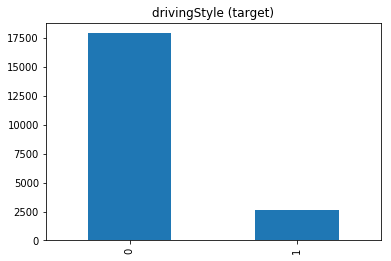

In [828]:
target_count = df.drivingStyle.value_counts()
print('EvenPaceStyle or Class 0:', target_count[0])
print('AgressivePaceStyle or Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='drivingStyle (target)');

Balancing using Python Imbalanced-Learn Module - Random UnderSampling

In [829]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Removed indexes: [ 6170  8243  3603 ... 15378 15381 15383]


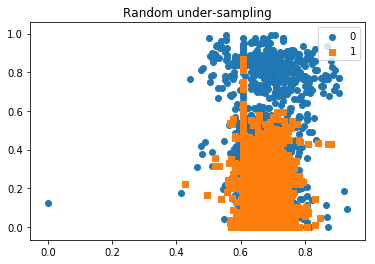

In [830]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_train, y_train)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

In [831]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2913, 14)
(971, 14)
(2913,)
(971,)


In [832]:
aggressive_percent = y_test.mean()
even_percent = 1 - y_test.mean()
print(aggressive_percent)
print(even_percent)

0.4840370751802266
0.5159629248197735


In [833]:
from sklearn.linear_model import LinearRegression, LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [834]:
y_pred = logreg.predict(X_test)
from sklearn import metrics
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.recall_score(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Compare actual response with predicted (accuracy):  0.7147270854788877
Precision:  0.6751361161524501
Recall:  0.7914893617021277
F1 Score:  0.7914893617021277
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.64      0.70       501
           1       0.68      0.79      0.73       470

    accuracy                           0.71       971
   macro avg       0.72      0.72      0.71       971
weighted avg       0.72      0.71      0.71       971

Confusion Matrix: 
 [[322 179]
 [ 98 372]]


Balancing using Python Imbalanced-Learn Module - Random OverSampling

-17571 new random picked points


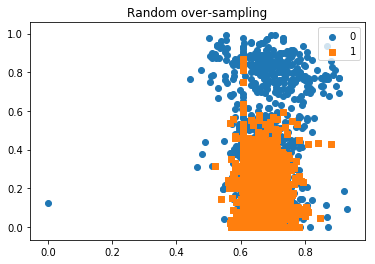

In [836]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [837]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2208, 14)
(736, 14)
(2208,)
(736,)


In [838]:
aggressive_percent = y_test.mean()
even_percent = 1 - y_test.mean()
print(aggressive_percent)
print(even_percent)

0.4986413043478261
0.5013586956521738


In [839]:
from sklearn.linear_model import LinearRegression, LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [840]:
y_pred = logreg.predict(X_test)
from sklearn import metrics
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.recall_score(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Compare actual response with predicted (accuracy):  0.7092391304347826
Precision:  0.6917293233082706
Recall:  0.7520435967302452
F1 Score:  0.7520435967302452
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.67      0.70       369
           1       0.69      0.75      0.72       367

    accuracy                           0.71       736
   macro avg       0.71      0.71      0.71       736
weighted avg       0.71      0.71      0.71       736

Confusion Matrix: 
 [[246 123]
 [ 91 276]]


In [841]:
from sklearn import svm
#modelsvm = svm.SVC(kernel ='linear')
#modelsvm.fit(X_train, y_train)


In [842]:

modelsvm = svm.SVC(kernel ='linear',class_weight='balanced', tol=0.001)
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [843]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  0.7092391304347826
Precision:  0.6898263027295285
Recall:  0.7574931880108992
F1 Score:  0.7574931880108992
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.66      0.70       369
           1       0.69      0.76      0.72       367

    accuracy                           0.71       736
   macro avg       0.71      0.71      0.71       736
weighted avg       0.71      0.71      0.71       736

Confusion Matrix: 
 [[244 125]
 [ 89 278]]


re-running svm.SVC(kernel ='linear',class_weight='balanced') on undersampled data

In [844]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2913, 14)
(971, 14)
(2913,)
(971,)


In [845]:
modelsvm = svm.SVC(kernel ='linear',class_weight='balanced', tol=0.1)
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.1, verbose=False)

In [846]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  0.721936148300721
Precision:  0.6811594202898551
Recall:  0.8
F1 Score:  0.8
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.65      0.71       501
           1       0.68      0.80      0.74       470

    accuracy                           0.72       971
   macro avg       0.73      0.72      0.72       971
weighted avg       0.73      0.72      0.72       971

Confusion Matrix: 
 [[325 176]
 [ 94 376]]


performing svm on rescaled features and oversampled data

In [847]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2208, 14)
(736, 14)
(2208,)
(736,)


In [848]:
modelsvm = svm.SVC(kernel ='linear',class_weight='balanced', tol=0.1)
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.1, verbose=False)

In [849]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  0.7092391304347826
Precision:  0.6917293233082706
Recall:  0.7520435967302452
F1 Score:  0.7520435967302452
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.67      0.70       369
           1       0.69      0.75      0.72       367

    accuracy                           0.71       736
   macro avg       0.71      0.71      0.71       736
weighted avg       0.71      0.71      0.71       736

Confusion Matrix: 
 [[246 123]
 [ 91 276]]


In [850]:
print(y.shape)

(20515,)


In [851]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15386, 14)
(5129, 14)
(15386,)
(5129,)


6373 new random picked points


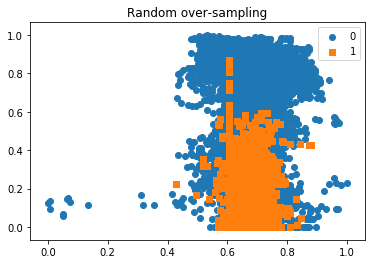

In [852]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [853]:
modelsvm = svm.SVC(kernel ='linear',class_weight='balanced', tol=0.001)
modelsvm.fit(X_ros, y_ros)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [854]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  0.6654318580620003
Precision:  0.24188075618031993
Recall:  0.7665130568356375
F1 Score:  0.7665130568356375
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.65      0.77      4478
           1       0.24      0.77      0.37       651

    accuracy                           0.67      5129
   macro avg       0.60      0.71      0.57      5129
weighted avg       0.86      0.67      0.72      5129

Confusion Matrix: 
 [[2914 1564]
 [ 152  499]]


performing KNeighbors on randomOverSampled Data

In [855]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_ros, y_ros)
y2_pred = knn.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y2_pred))
print("Precision: ", metrics.precision_score(y_test, y2_pred))
print("Recall: ", metrics.recall_score(y_test, y2_pred))
print("F1 Score: ", metrics.recall_score(y_test, y2_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y2_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y2_pred))

Compare actual response with predicted (accuracy):  0.9190875414310782
Precision:  0.6365740740740741
Recall:  0.8448540706605223
F1 Score:  0.8448540706605223
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      4478
           1       0.64      0.84      0.73       651

    accuracy                           0.92      5129
   macro avg       0.81      0.89      0.84      5129
weighted avg       0.93      0.92      0.92      5129

Confusion Matrix: 
 [[4164  314]
 [ 101  550]]


In [858]:
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import sklearn.metrics as metrics

SyntaxError: invalid syntax (<ipython-input-858-b097a1bd6c0f>, line 5)

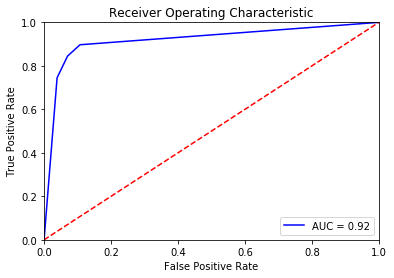

In [861]:
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


